# 대출상점 문제와 같은 데이터, 1등코드 참고
https://dacon.io/competitions/official/42473/codeshare/427?page=1&dtype=recent&ptype=pub

In [1]:
!unzip data04.zip

Archive:  data04.zip
  inflating: submission.csv          
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [2]:
#plt에서 한글사용위해
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,611 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import datetime
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

import matplotlib as mpl
# 고해상도 Plot을 위해 DPI 조절
mpl.rcParams['figure.dpi']= 150
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!unzip train.csv.zip
!unzip test.csv.zip


Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     


In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


## 시계열 데이터 처리를 위하여 datetime 형으로 변환

In [5]:

train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')
train['time']=pd.to_datetime(train['time'],format='%H:%M:%S')

In [6]:
train['year']=train['date'].dt.year
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day

train['hour']=train['time'].dt.hour
train['minute']=train['time'].dt.minute
train['second']=train['time'].dt.second



In [7]:
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month,day,hour,minute,second
0,0,2016-12-14,1900-01-01 18:05:31,d297bba73f,5,NaN,2,0,2016,12,14,18,5,31
1,0,2016-12-14,1900-01-01 18:05:54,d297bba73f,-5,NaN,2,0,2016,12,14,18,5,54
2,0,2016-12-19,1900-01-01 12:42:31,0880849c05,144,NaN,0,0,2016,12,19,12,42,31
3,0,2016-12-19,1900-01-01 12:48:08,8b4f9e0e95,66,NaN,0,0,2016,12,19,12,48,8
4,0,2016-12-19,1900-01-01 13:31:08,7ad237eed0,24,NaN,0,0,2016,12,19,13,31,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,1900-01-01 17:58:31,e254bf70d9,600,NaN,3,0,2018,7,19,17,58,31
3362792,1799,2018-07-19,1900-01-01 18:54:34,8f41c89891,275,NaN,3,0,2018,7,19,18,54,34
3362793,1799,2018-07-22,1900-01-01 14:46:57,aeb64fe1fb,350,NaN,6,0,2018,7,22,14,46,57
3362794,1799,2018-07-25,1900-01-01 18:09:13,57932602d6,300,NaN,2,0,2018,7,25,18,9,13


##년단위로 plot 해보기->2017년이 가장 매출이 높음

In [8]:
train_year = train.groupby(['year'])['amount'].sum().reset_index()
train_year

,year,amount
0,2016,69385560
1,2017,238703895
2,2018,182751998


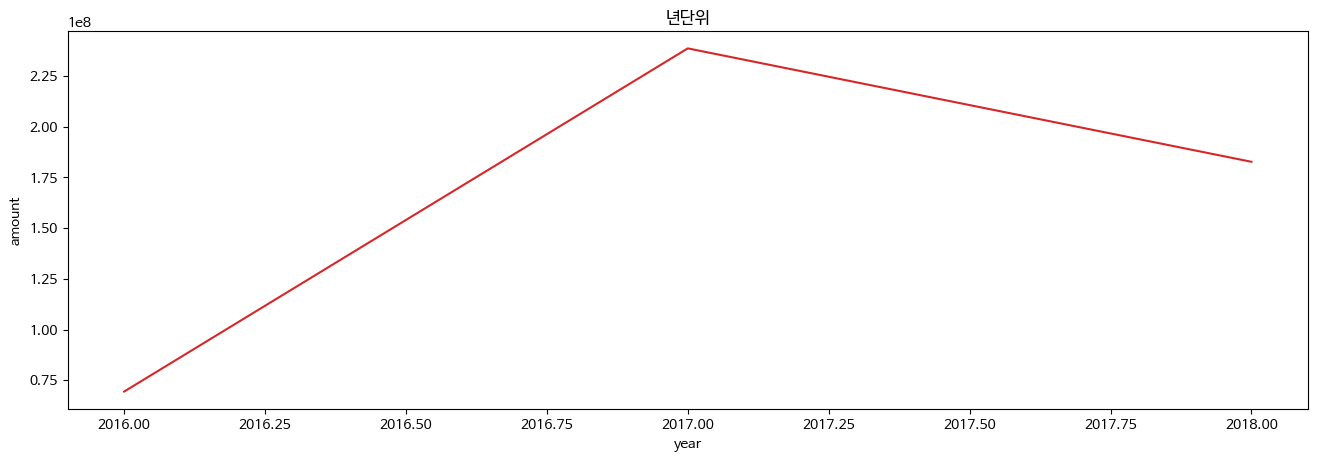

In [9]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(train_year['year'], train_year['amount'], color='tab:red')
plt.gca().set(title="년단위", xlabel='year', ylabel='amount')
plt.show()

##날짜별 모든 가게에서의 거래건수

In [10]:

cnt_srs = train.groupby(['date'])['store_id'].size().reset_index()
cnt_srs


,date,store_id
0,2016-08-01,2808
1,2016-08-02,2792
2,2016-08-03,2990
3,2016-08-04,2920
4,2016-08-05,2958
...,...,...
725,2018-07-27,6731
726,2018-07-28,6402
727,2018-07-29,5622
728,2018-07-30,5838


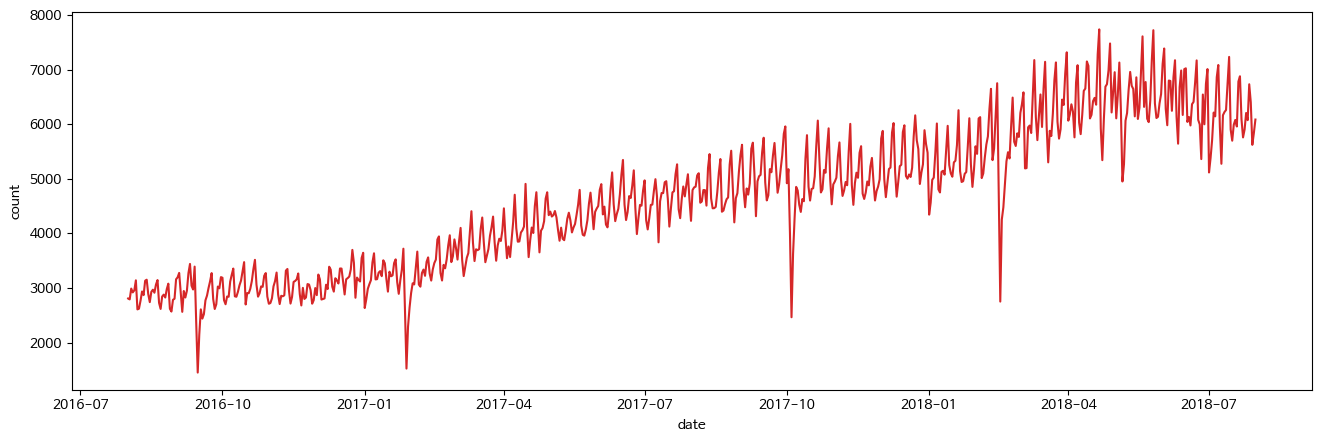

In [11]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(cnt_srs.date, cnt_srs.store_id, color='tab:red')
plt.gca().set(title="", xlabel="date", ylabel="count")
plt.show()



*   전체적으로 우상향 그래프
*   약 2016년 9월 말, 2017년 2월 초, 2017년 10월초, 2018년 2월 초 매출이 적은날 => 명절 날(추석 혹은 설 명절) 매출이 적은 것 확인 



In [12]:
train['amount'].describe()

count    3.362796e+06
mean     1.459623e+02
std      6.017306e+02
min     -2.500000e+05
25%      3.200000e+01
50%      7.500000e+01
75%      1.500000e+02
max      2.500000e+05
Name: amount, dtype: float64

In [13]:
train_amount = train.groupby(['store_id'])['amount'].sum().reset_index()
train_amount

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312
...,...,...
1770,1795,1319911
1771,1796,15372
1772,1797,49645
1773,1798,110011


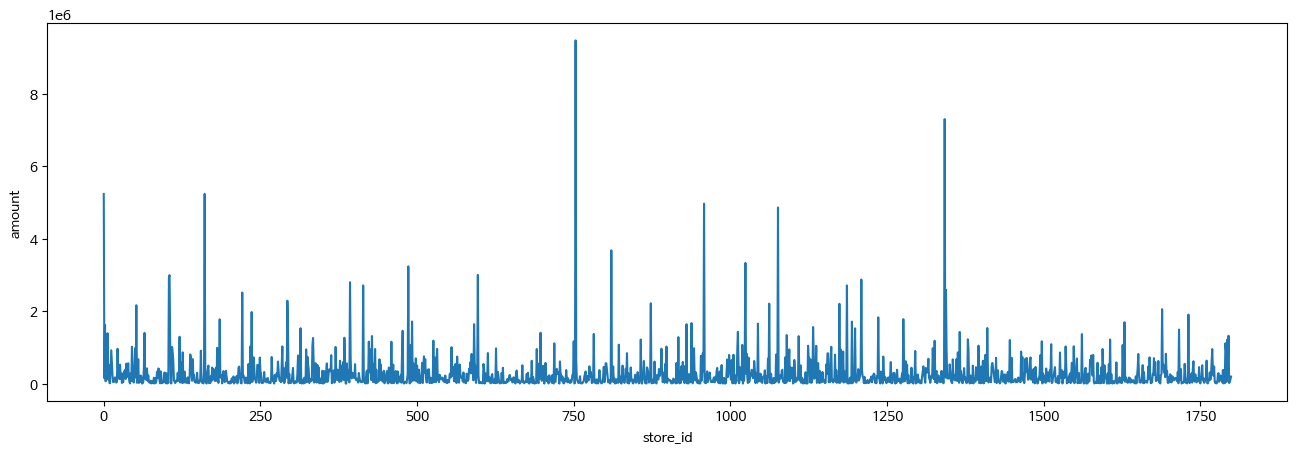

In [14]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(train_amount.store_id, train_amount.amount, color='tab:blue')
plt.gca().set(title="", xlabel="store_id", ylabel="amount")
plt.show()

In [15]:
train_amount_sort=train_amount.sort_values(by=['amount'],axis=0)
train_amount_sort.head()


,store_id,amount
857,866,0
978,988,0
346,350,0
817,826,5
601,608,5


In [16]:
train_amount_sort.tail()

,store_id,amount
948,958,4965728
0,0,5234611
158,161,5236075
1326,1342,7301327
746,753,9474601


*   매출최고액=> store_id: 753   매출: 9474601
*   매출최저액=> store_id: 866, 988, 350   매출: 0

In [17]:
print("거래가 취소된 경우:", train[train['amount']<0].shape[0],"거래 표기실수인 경우:" ,train[train['amount']==0].shape[0])

거래가 취소된 경우: 33832 거래 표기실수인 경우: 1024


In [18]:
cancel_df = train[train['amount']<0]
cancel_df_hour = pd.DataFrame(cancel_df.groupby('hour').size().reset_index())
cancel_df_hour.columns=['hour','hour_size']

cnt_srs = cancel_df_hour['hour_size']


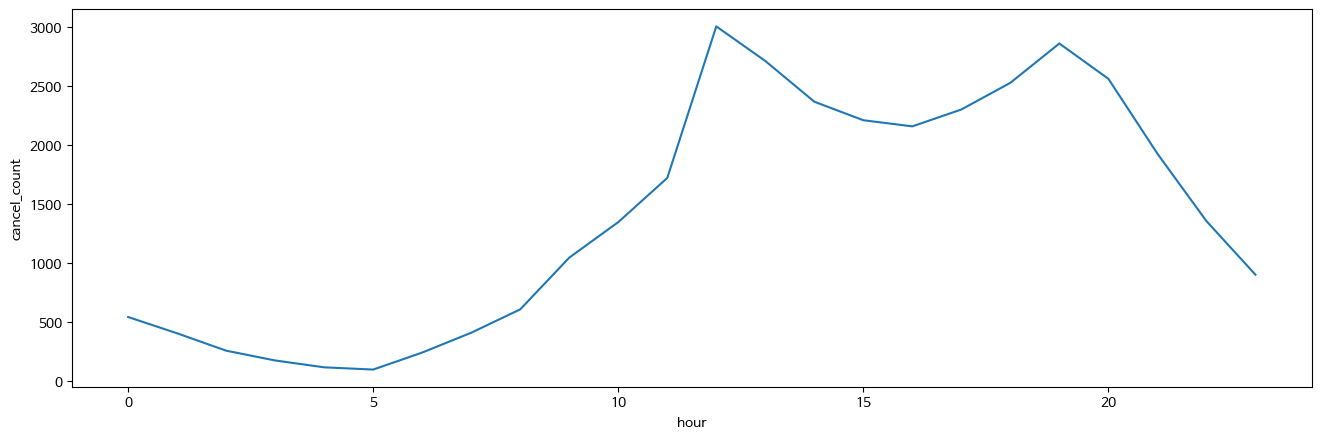

In [19]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(cancel_df_hour.hour, cancel_df_hour.hour_size, color='tab:blue')
plt.gca().set(title="", xlabel="hour", ylabel="cancel_count")
plt.show()

점심시간과 저녁시간에 취소 건수가 많음

#클러스터링->일별 매출 변화율이 비슷한 것끼리 군집화

#agg()함수 : groupby 집계할때  반환되는 결과가 series

[참고사이트](https://rfriend.tistory.com/392)



In [ ]:
#예시
#train_agg=train.agg(['size','mean','std','min','max'])
#train_agg

In [20]:
#예시1
#딕셔너리 형태로 들어감
train_0=train.groupby(['store_id','date']).agg({'amount':['mean','std']}).reset_index()
train_0

store_id       date      amount            
                                  mean         std
0             0 2016-12-14    0.000000    7.071068
1             0 2016-12-19   65.000000   52.947882
2             0 2016-12-20   70.452381   74.512456
3             0 2016-12-21   89.079787  100.393925
4             0 2016-12-22   80.630872   81.623754
...         ...        ...         ...         ...
480155     1799 2018-07-17  350.000000    0.000000
480156     1799 2018-07-19  437.500000  229.809704
480157     1799 2018-07-22  350.000000         NaN
480158     1799 2018-07-25  300.000000         NaN
480159     1799 2018-07-30  325.000000         NaN

[480160 rows x 4 columns]

In [23]:
#예시2
train_0=train.groupby(['store_id','date'])['amount'].agg(['mean','std']).reset_index()
train_0

,store_id,date,mean,std
0,0,2016-12-14,0.000000,7.071068
1,0,2016-12-19,65.000000,52.947882
2,0,2016-12-20,70.452381,74.512456
3,0,2016-12-21,89.079787,100.393925
4,0,2016-12-22,80.630872,81.623754
...,...,...,...,...
480155,1799,2018-07-17,350.000000,0.000000
480156,1799,2018-07-19,437.500000,229.809704
480157,1799,2018-07-22,350.000000,NaN
480158,1799,2018-07-25,300.000000,NaN



##파생변수 amount_lag1, amount_lag7
*   amount_lag1: 전날의 매출 (주기 :1일)
*   amount_lag7: 일주일 전의 매출(주기: 7일)



In [100]:

train1 = train.groupby(['store_id','date']).agg({'amount':'mean'}).reset_index()
train1

,store_id,date,amount
0,0,2016-12-14,0.000000
1,0,2016-12-19,65.000000
2,0,2016-12-20,70.452381
3,0,2016-12-21,89.079787
4,0,2016-12-22,80.630872
...,...,...,...
480155,1799,2018-07-17,350.000000
480156,1799,2018-07-19,437.500000
480157,1799,2018-07-22,350.000000
480158,1799,2018-07-25,300.000000


In [101]:
train1['amount_lag1'] = train1.groupby(['store_id'])['amount'].shift(1)
train1['amount_lag7'] = train1.groupby(['store_id'])['amount'].shift(7)
train1

,store_id,date,amount,amount_lag1,amount_lag7
0,0,2016-12-14,0.000000,NaN,NaN
1,0,2016-12-19,65.000000,0.000000,NaN
2,0,2016-12-20,70.452381,65.000000,NaN
3,0,2016-12-21,89.079787,70.452381,NaN
4,0,2016-12-22,80.630872,89.079787,NaN
...,...,...,...,...,...
480155,1799,2018-07-17,350.000000,275.000000,475.0
480156,1799,2018-07-19,437.500000,350.000000,150.0
480157,1799,2018-07-22,350.000000,437.500000,300.0
480158,1799,2018-07-25,300.000000,350.000000,175.0


In [102]:
train1=train1.fillna(0)
train1

,store_id,date,amount,amount_lag1,amount_lag7
0,0,2016-12-14,0.000000,0.000000,0.0
1,0,2016-12-19,65.000000,0.000000,0.0
2,0,2016-12-20,70.452381,65.000000,0.0
3,0,2016-12-21,89.079787,70.452381,0.0
4,0,2016-12-22,80.630872,89.079787,0.0
...,...,...,...,...,...
480155,1799,2018-07-17,350.000000,275.000000,475.0
480156,1799,2018-07-19,437.500000,350.000000,150.0
480157,1799,2018-07-22,350.000000,437.500000,300.0
480158,1799,2018-07-25,300.000000,350.000000,175.0


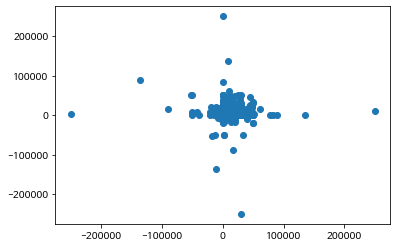

In [103]:
plt.scatter(train1['amount_lag1'],train1['amount_lag7'])

##파생변수 amount_ratio1, amount_ratio7
*   amount_ratio1 : 현재거래액수/전날 거래액수
*   amount_ratio7 : 현재거래액수/일주일 전날 거래액수

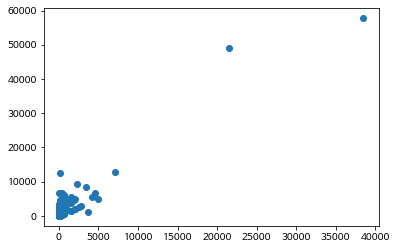

In [104]:
train1['amount_ratio1'] = train1['amount']/ (train1['amount_lag1']+1)
train1['amount_ratio7'] = train1['amount']/ (train1['amount_lag7']+1)
#train1 = train1[train1['date']>='2017-01-01']

train2 = train1.groupby(['store_id']).agg({'amount_ratio1':'mean','amount_ratio7':'mean'}).reset_index()
feature = train2[['store_id','amount_ratio1','amount_ratio7']]

plt.scatter(train2['amount_ratio1'],train2['amount_ratio7'])

amount_ratio7가 비정상적으로 높은 구간이 있음

In [105]:
train_max_amount_ratio7=train1[train1['amount_ratio7']>40000]
train_max_amount_ratio7.store_id.unique()


array([ 279,  291,  847, 1600])

##[scipy.cluster.hierarchy linkage  사용방법](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

*   계층적군집화이므로 군집개수를 정해주지 않아도 된다.
*   군집화는 1부터 시작한다

method
*   single/ complete /average /weighted / centroid

계층적군집화에서 특정 군집에서 끊고 싶을 때->[fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)

[관련자료](https://bcho.tistory.com/1204)



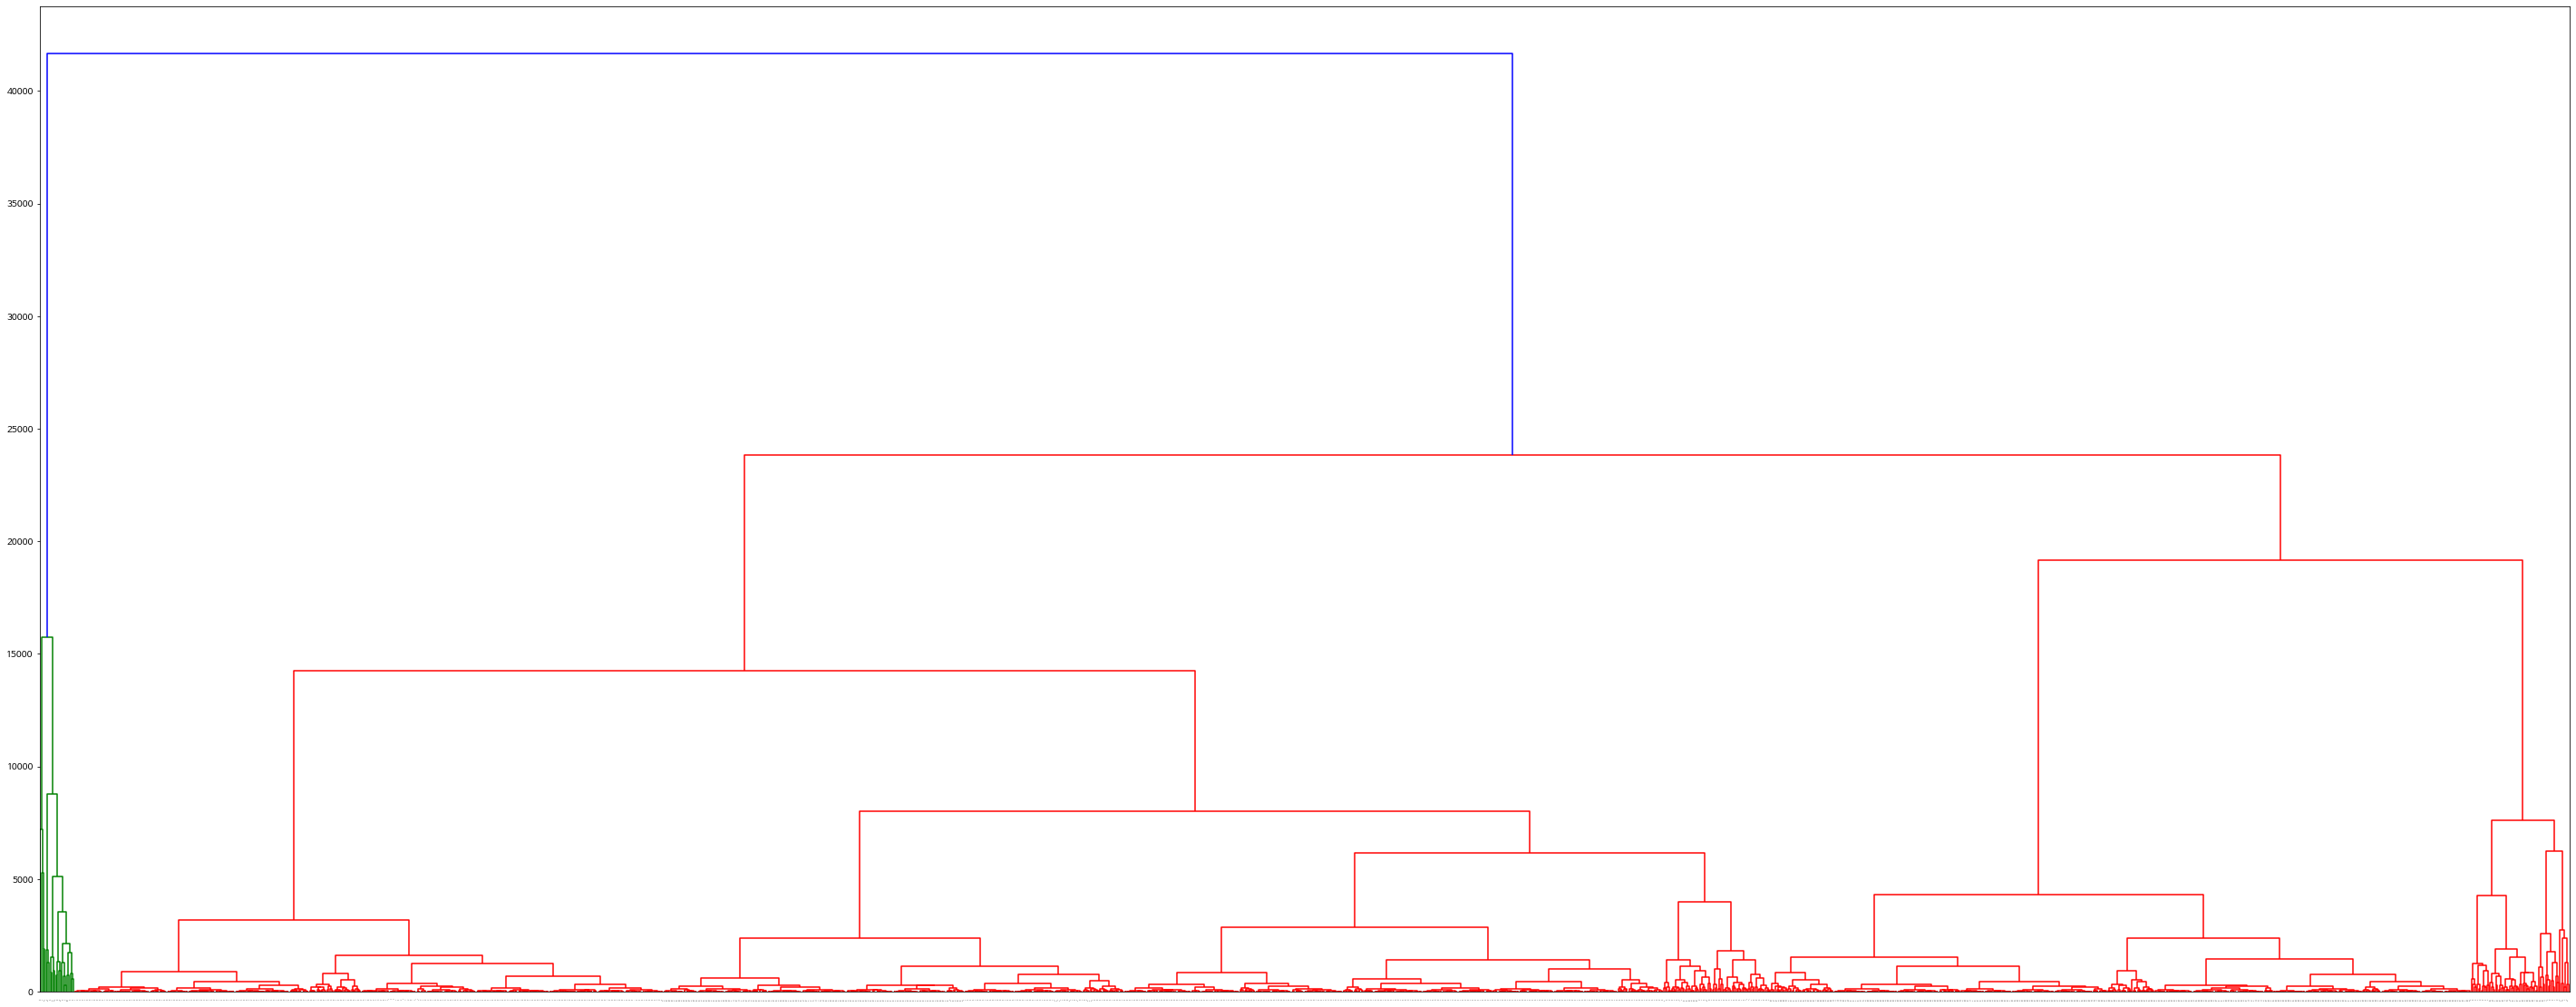

In [106]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

#feature = train2[['store_id','amount_ratio1','amount_ratio7']]
feature = feature[feature['amount_ratio7']<40000]

Z = linkage(feature,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1,
)
plt.show()

In [107]:
from scipy.cluster.hierarchy import fcluster

k=3
predict=fcluster(Z, k, criterion='maxclust')
feature['cluster']=predict
train1 = pd.merge(train1,feature,on='store_id', how='left')


In [108]:
train1

,store_id,date,amount,amount_lag1,amount_lag7,amount_ratio1_x,amount_ratio7_x,amount_ratio1_y,amount_ratio7_y,cluster
0,0,2016-12-14,0.000000,0.000000,0.0,0.000000,0.000000,1.106976,1.974378,2.0
1,0,2016-12-19,65.000000,0.000000,0.0,65.000000,65.000000,1.106976,1.974378,2.0
2,0,2016-12-20,70.452381,65.000000,0.0,1.067460,70.452381,1.106976,1.974378,2.0
3,0,2016-12-21,89.079787,70.452381,0.0,1.246701,89.079787,1.106976,1.974378,2.0
4,0,2016-12-22,80.630872,89.079787,0.0,0.895105,80.630872,1.106976,1.974378,2.0
...,...,...,...,...,...,...,...,...,...,...
480155,1799,2018-07-17,350.000000,275.000000,475.0,1.268116,0.735294,2.286360,9.029547,3.0
480156,1799,2018-07-19,437.500000,350.000000,150.0,1.246439,2.897351,2.286360,9.029547,3.0
480157,1799,2018-07-22,350.000000,437.500000,300.0,0.798176,1.162791,2.286360,9.029547,3.0
480158,1799,2018-07-25,300.000000,350.000000,175.0,0.854701,1.704545,2.286360,9.029547,3.0


In [110]:
train1[train1.cluster==0]
#group0은 급격한 일별매출변화율을 가진 그룹, 847이 속해있음

,store_id,date,amount,amount_lag1,amount_lag7,amount_ratio1_x,amount_ratio7_x,amount_ratio1_y,amount_ratio7_y,cluster


In [111]:
train1 = train1.fillna(0)

train_0 = train1[train1['cluster']==0]
train_1 = train1[train1['cluster']==1]
train_2 = train1[train1['cluster']==2]
train_3 = train1[train1['cluster']==3]
#train_4 = train1[train1['cluster']==4]

cnt_srs_0 = train_0.groupby('date')['amount'].mean().reset_index()
cnt_srs_1 = train_1.groupby('date')['amount'].mean().reset_index()
cnt_srs_2 = train_2.groupby('date')['amount'].mean().reset_index()
cnt_srs_3 = train_3.groupby('date')['amount'].mean().reset_index()
#cnt_srs_4 = train_4.groupby('date')['amount'].mean()

cnt_srs_1

,date,amount
0,2016-08-31,27500.0
1,2016-10-11,7271.0
2,2016-10-25,10000.0
3,2016-10-27,2500.0
4,2016-10-28,5.0
...,...,...
132,2018-07-11,11000.0
133,2018-07-14,500.0
134,2018-07-16,10937.5
135,2018-07-19,3000.0


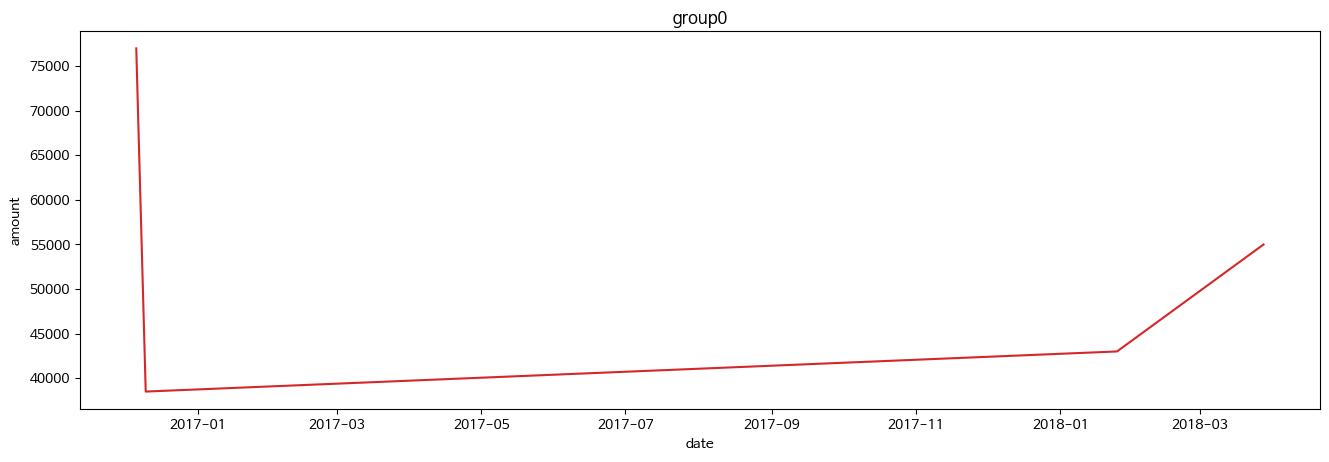

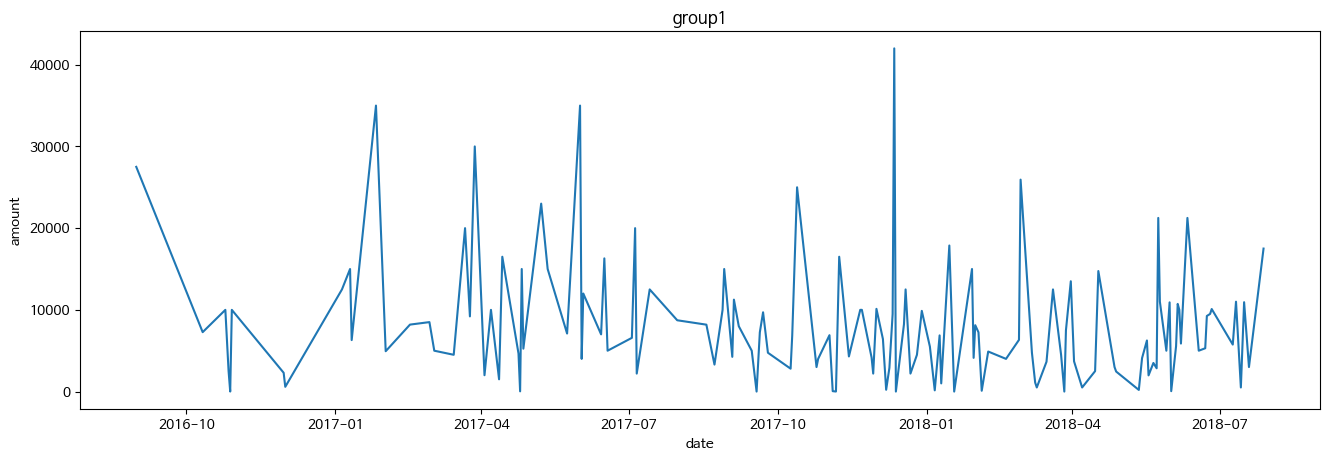

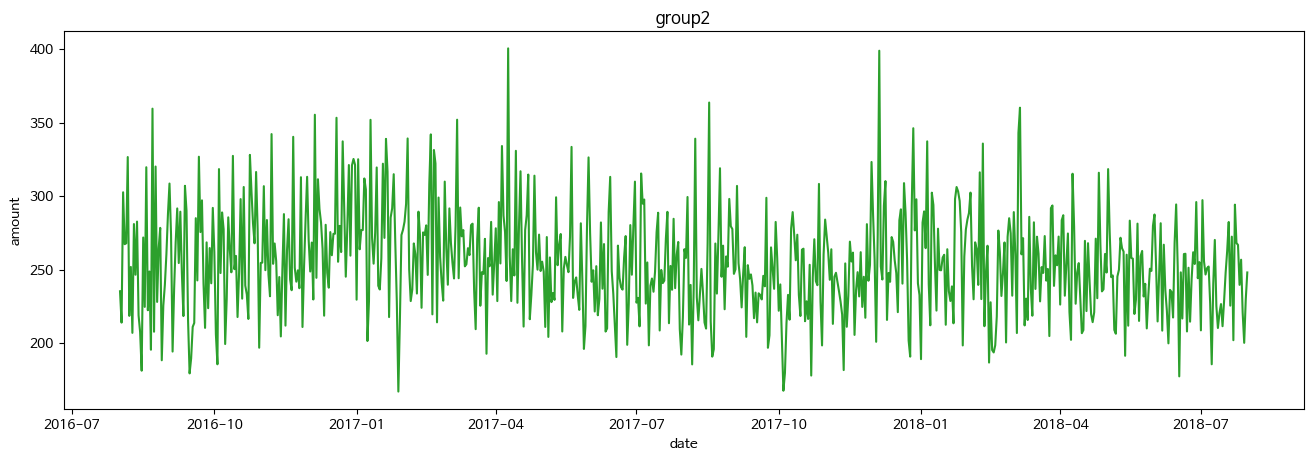

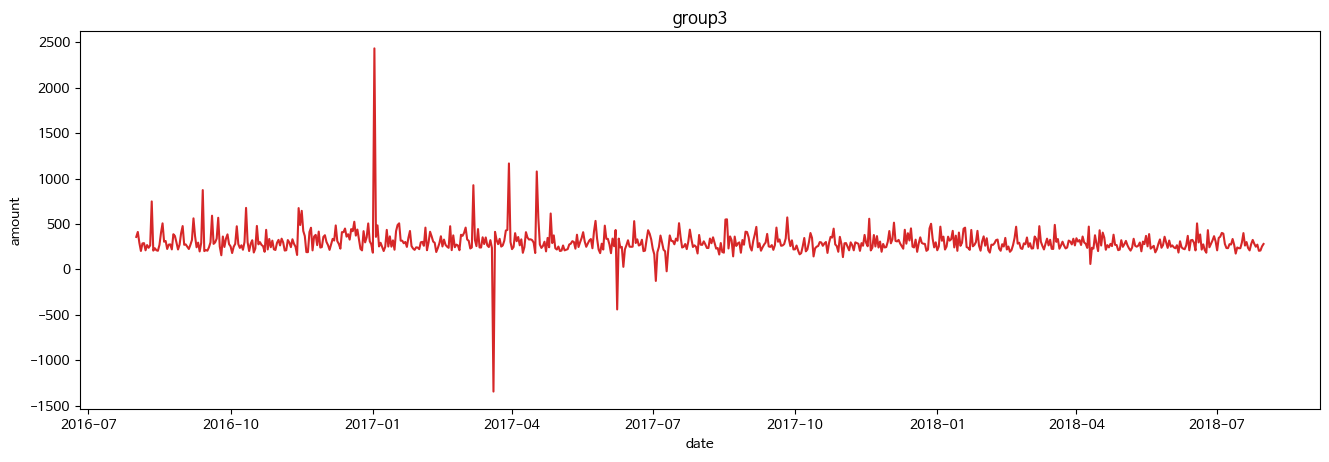

In [112]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(cnt_srs_0.date, cnt_srs_0.amount, color='tab:red')
plt.gca().set(title="group0", xlabel="date", ylabel="amount")
plt.show()

plt.figure(figsize=(16,5), dpi=100)
plt.plot(cnt_srs_1.date, cnt_srs_1.amount, color='tab:blue')
plt.gca().set(title="group1", xlabel="date", ylabel="amount")
plt.show()

plt.figure(figsize=(16,5), dpi=100)
plt.plot(cnt_srs_2.date, cnt_srs_2.amount, color='tab:green')
plt.gca().set(title="group2", xlabel="date", ylabel="amount")
plt.show()

plt.figure(figsize=(16,5), dpi=100)
plt.plot(cnt_srs_3.date, cnt_srs_3.amount, color='tab:red')
plt.gca().set(title="group3", xlabel="date", ylabel="amount")
plt.show()

*   group0은 변화율이 커서 특정날짜에서만 큰 매출이 있는 경우
*   group1은 변화율이 큰폭으로 왔다갔다해서 매출도 왔다갔다 하는 곳
*   group2은 변화율이 안정적이어서 매출이 안정적인 곳
*   group3은 변화율이 비교적 안정적이나 변화가 확튀는 곳이나 음수인 경우가 있는 곳